In [1]:
import pandas as pd
# salad is always Other so we can drop it
df = pd.read_csv(filepath_or_buffer='/kaggle/input/fast-food-calories-data/fastfood_calories.csv', index_col=[0]).drop(columns=['salad'])
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
1,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0
2,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0
3,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0
4,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0
5,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515 entries, 1 to 515
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
dtypes: float64(7), int64(7), object(2)
memory usage: 68.4+ KB


In [3]:
df.nunique()

restaurant       8
item           505
calories       113
cal_fat        117
total_fat       80
sat_fat         40
trans_fat       10
cholesterol     52
sodium         197
total_carb     103
fiber           18
sugar           31
protein         70
vit_a           21
vit_c           23
calcium         26
dtype: int64

In [4]:
from plotly.express import bar
bar(data_frame=df['restaurant'].value_counts().to_frame().reset_index(), x='restaurant', y='count')

(-0.5, 1199.5, 1199.5, -0.5)

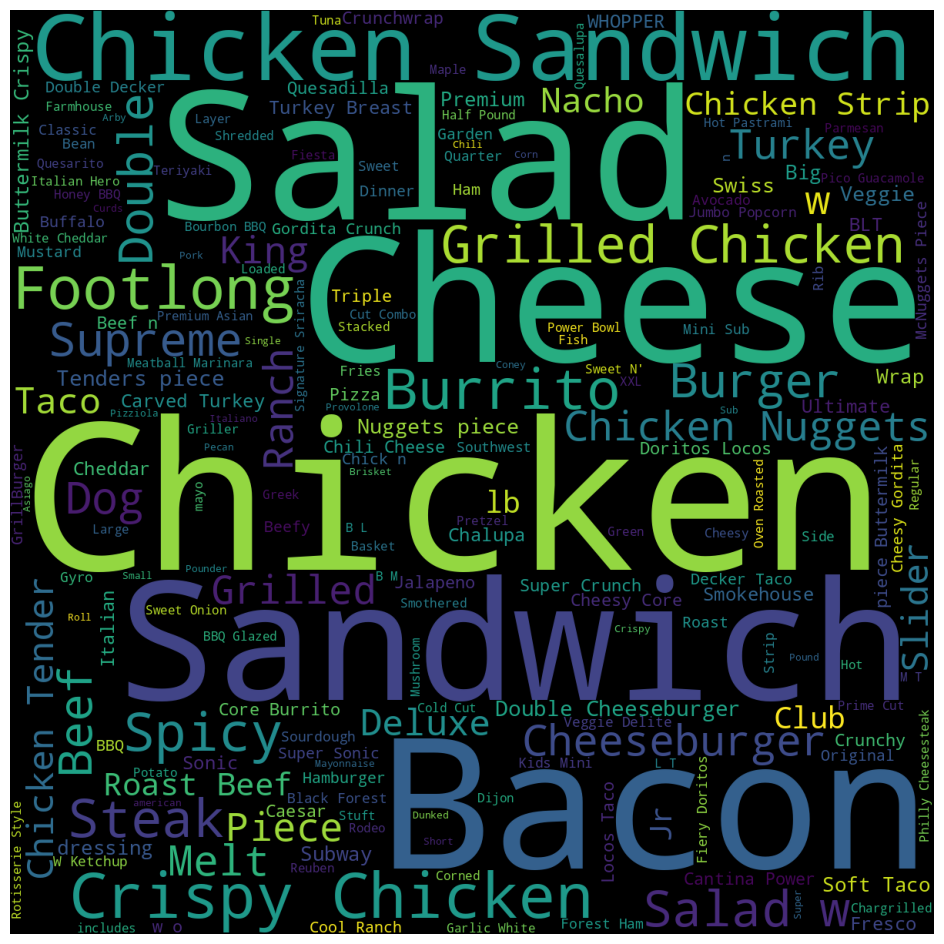

In [5]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join(df['item'].values), ))
axis('off')

In [6]:
df.columns

Index(['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar',
       'protein', 'vit_a', 'vit_c', 'calcium'],
      dtype='object')

In [7]:
from plotly.express import histogram
for column in ['calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar',
       'protein', 'vit_a', 'vit_c', 'calcium']:
    histogram(data_frame=df, x=column, title=column).show()

In [8]:
from plotly.express import scatter
scatter(data_frame=df, x='calories', y='sodium', color='restaurant', hover_name='item', log_x=True, log_y=True, )

In [9]:
scatter(data_frame=df, x='cholesterol', y='sodium', color='restaurant', hover_name='item', log_x=True, log_y=True, )

In [10]:
scatter(data_frame=df, x='calories', y='total_fat', color='restaurant', hover_name='item', log_x=True, log_y=True, )

First let's do some dimension reduction using the columns where we have all the data.

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=2023, n_iter=10000, )
full_df = df.drop(columns=['fiber', 'protein', 'vit_a', 'vit_c', 'calcium']).copy()
full_df[['x', 'y']] = tsne.fit_transform(X=full_df.drop(columns=['restaurant', 'item']))
scatter(data_frame=full_df, x='x', y='y', color='restaurant', hover_name='item').show()
scatter(data_frame=full_df, x='x', y='y', color='calories', hover_name='item').show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 515 samples in 0.001s...
[t-SNE] Computed neighbors for 515 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 515 / 515
[t-SNE] Mean sigma: 90.594976
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.007984
[t-SNE] KL divergence after 1750 iterations: 0.347868


Now let's do the same thing but keep all the columns and drop the rows with missing values.

In [12]:
small_df = df.dropna().copy()
small_df[['x', 'y']] = tsne.fit_transform(X=small_df.drop(columns=['restaurant', 'item']))
scatter(data_frame=small_df, x='x', y='y', color='restaurant', hover_name='item').show()
scatter(data_frame=small_df, x='x', y='y', color='calories', hover_name='item').show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 301 samples in 0.001s...
[t-SNE] Computed neighbors for 301 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 301 / 301
[t-SNE] Mean sigma: 130.007690
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.000595
[t-SNE] KL divergence after 1050 iterations: 0.307591
